<a href="https://colab.research.google.com/github/mohdimad29/Personal_loan/blob/main/Personal_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Problem Statement
The bank management is looking to increase their profits by converting its liability customers to personal loan customers. The campaign that the bank ran last year has got them tremendous success rate of 9% and they want the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget again.

####What we've got
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

###Step 01: Importing the Libraries for our dataset.

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


### Step 02: Load the Data

In [2]:
#Gathering Data
df=pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")

In [3]:
#Data Shape
print('The shape of our dataset is',df.shape)
print('Number of columns',df.shape[1])
print('Number of rows',df.shape[0])

The shape of our dataset is (5000, 14)
Number of columns 14
Number of rows 5000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
df.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1846,1847,56,32,15,90089,1,0.1,2,0,0,0,0,1,0
3122,3123,38,14,54,90095,2,0.6,3,218,0,0,0,0,0
1145,1146,32,6,99,92101,2,1.5,3,0,0,0,0,0,1
2478,2479,30,5,178,94063,2,6.7,1,0,0,0,0,0,0
2994,2995,50,24,179,94025,1,1.0,1,0,0,0,0,1,0


In [8]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


####Step 03 : Data Observation 
There are 5000 entries, 13 features and a final target variable. All features are numerical features and of them Education,Mortgage,Securities Account,CD Account,Online,Credit Card,Personal Loan are numerical categorical feature.



In [9]:
#Dropping the Irrelevant columns
df.drop(columns=['ID','ZIP Code'],axis=1,inplace=True)

In [10]:
df.shape

(5000, 12)

In [11]:
#Confirming if the specific attributes have been dropped or not
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

<Axes: xlabel='Personal Loan', ylabel='count'>

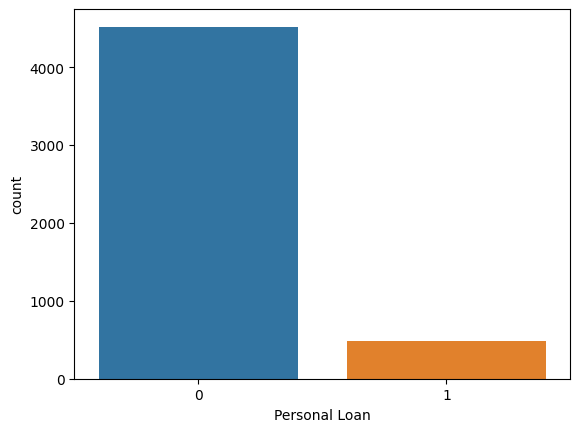

In [12]:
#Checking the balance of out target variable
sns.countplot(x="Personal Loan",data=df)

######Looks like their is high class imbalance

In [13]:
#Checking Unique Values in the attributes
df.nunique()

Age                    45
Experience             47
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [14]:
num_attr=['Age','Experience','Income','CCAvg','Mortgage']

In [15]:
#Checking Outilers and later visualization
#Checking Outilers
Q1=df[num_attr].quantile(0.25)
Q3=df[num_attr].quantile(0.75)
IQR=Q3-Q1
IQR
((df[num_attr]<(Q1-1.5*IQR)) | (df[num_attr]>(Q3+1.5*IQR))).any()

Age           False
Experience    False
Income         True
CCAvg          True
Mortgage       True
dtype: bool

In [16]:
df.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [17]:
###checking our data with profile report 
!pip install pandas-profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file ='output.html')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
#framming a new name to all the columns in a list except the target feature.
data2=['Age','Mortgage','Income','CCAvg','Securities Account','Family','CreditCard','Online','CD Account','Education','Experience']

In [19]:
num_attr=['Age','Experience','Income','CCAvg','Mortgage']

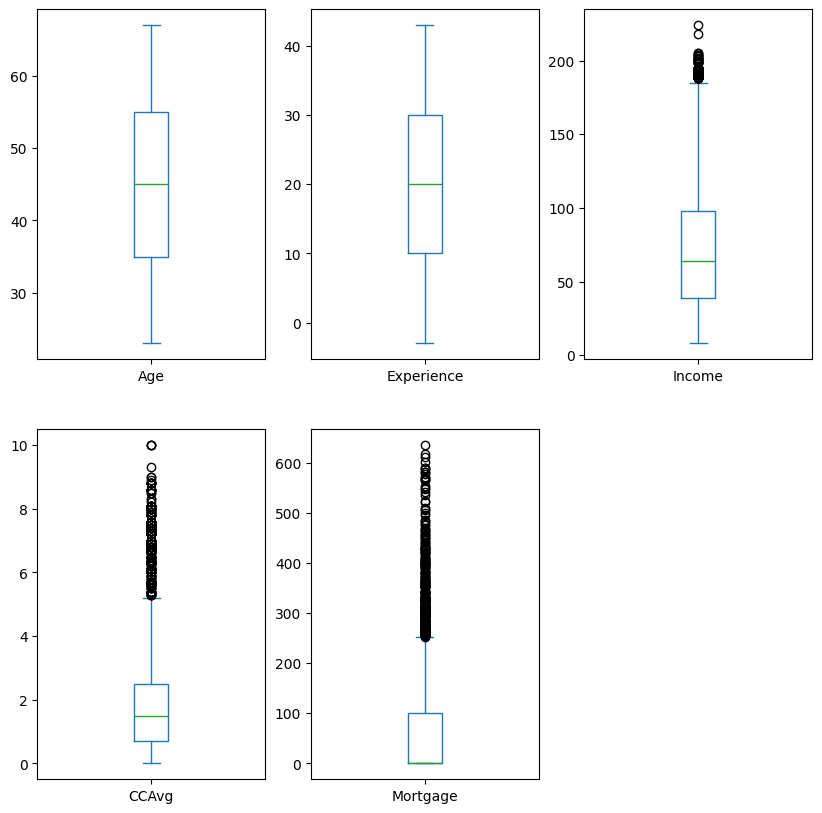

In [20]:
#visualization of outilers, barplot to project outliers.
df[num_attr].plot(kind='box',subplots=True,sharex=False,sharey=False,figsize=(10,10),layout=(2,3))
plt.show()

In [21]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [22]:
outliers = find_outliers_IQR(df['CCAvg'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
outliers

number of outliers: 324
max outlier value: 10.0
min outlier value: 5.3


9       8.90
18      8.10
44      5.70
55      8.00
61      5.70
        ... 
4908    6.10
4911    7.50
4937    8.60
4980    5.30
4993    6.67
Name: CCAvg, Length: 324, dtype: float64

In [23]:
df.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [24]:
outliers = find_outliers_IQR(df['Mortgage'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
outliers

number of outliers: 291
max outlier value: 635
min outlier value: 253


22      260
39      285
42      412
59      455
66      336
       ... 
4859    541
4865    342
4899    299
4942    308
4963    306
Name: Mortgage, Length: 291, dtype: int64

In [25]:
outliers = find_outliers_IQR(df['Income'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
outliers

number of outliers: 96
max outlier value: 224
min outlier value: 188


18      193
47      194
53      190
59      188
303     195
       ... 
4659    199
4670    194
4895    201
4981    195
4993    218
Name: Income, Length: 96, dtype: int64

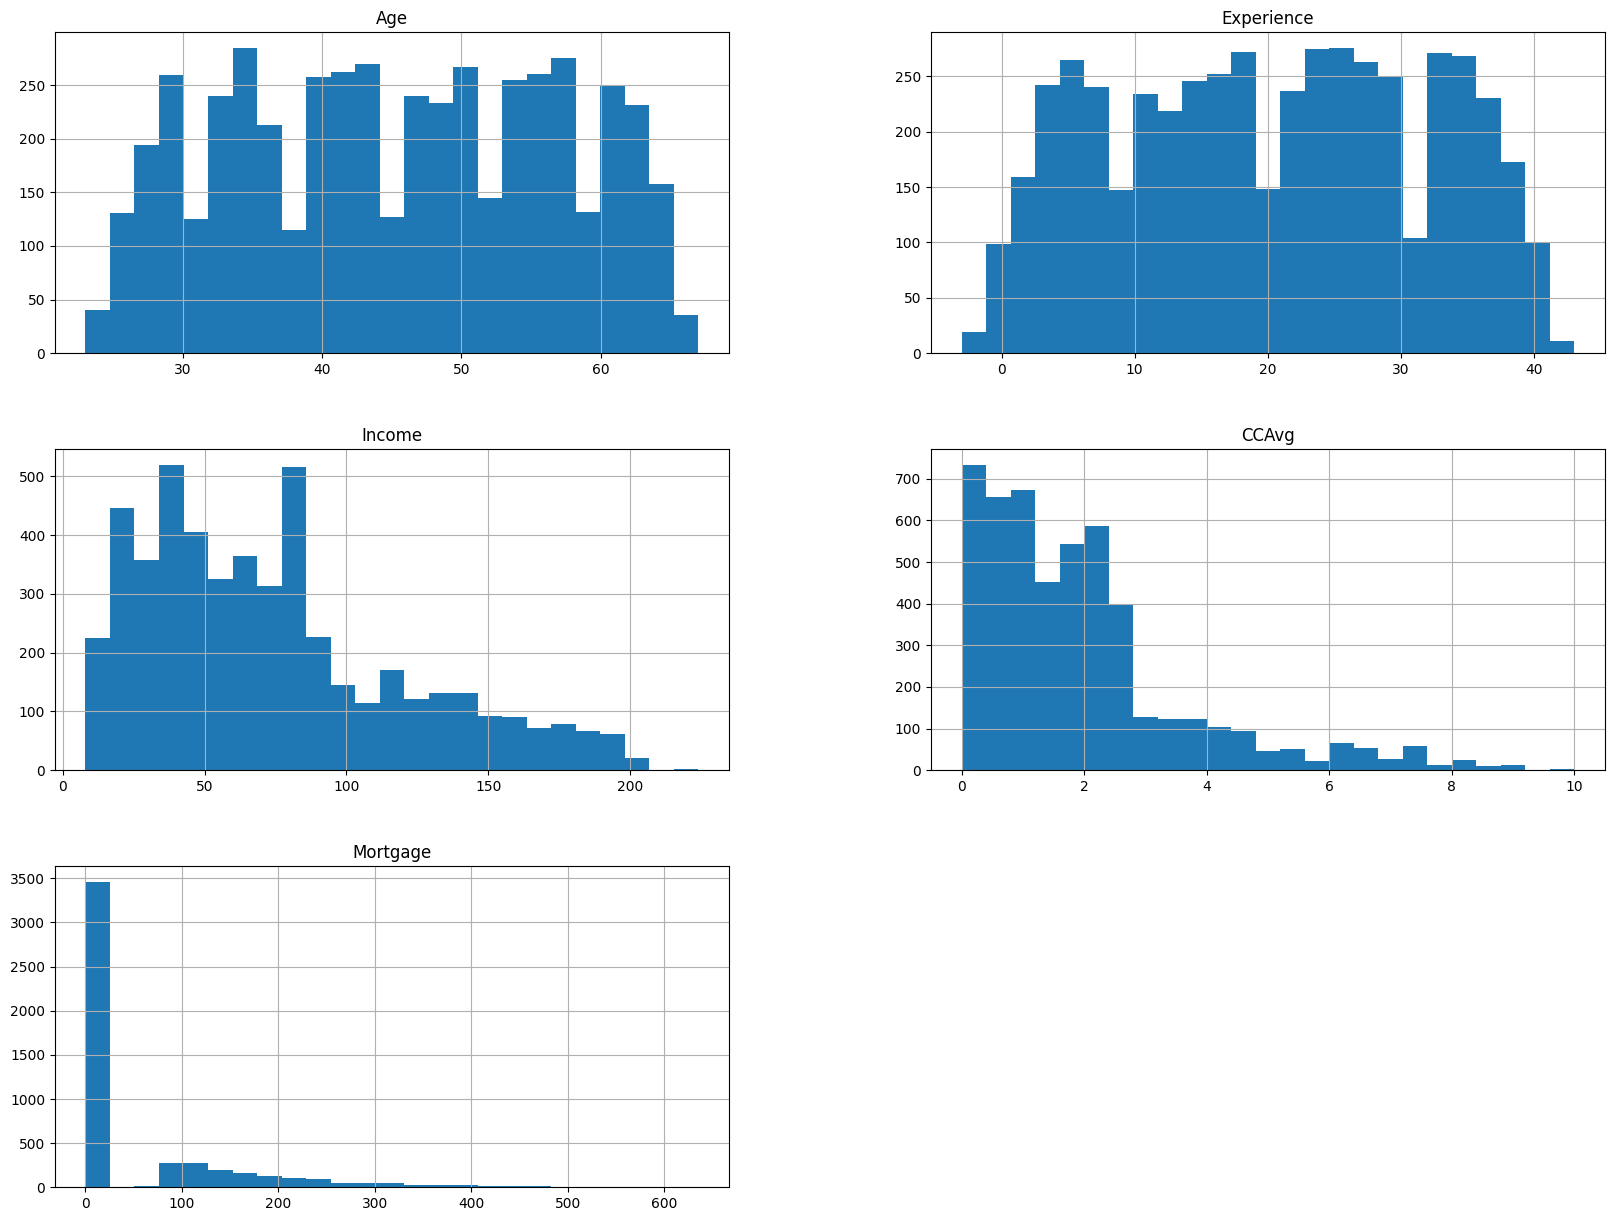

In [26]:
df.hist(num_attr,bins=25,figsize=(20,15))
plt.show()

In [27]:
#as we can see in our above Mortgage distribution I've applied feature engineering to it
df['IsMortgaged'] = df['Mortgage'].apply(lambda x:0 if x==0 else 1)

In [28]:
df  

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,IsMortgaged
0,25,1,49,4,1.6,1,0,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0,1
4997,63,39,24,2,0.3,3,0,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0,0


In [29]:
df.drop(columns=['Mortgage'],axis=1,inplace=True)

In [30]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'IsMortgaged'],
      dtype='object')

In [31]:
data2=['Age','IsMortgaged','Income','CCAvg','Securities Account','Family','CreditCard','Online','CD Account','Education','Experience']

In [32]:
data2=df[data2]

In [33]:
num_attr1=['Age','Experience','Income','CCAvg','IsMortgaged']

In [34]:
data2.columns

Index(['Age', 'IsMortgaged', 'Income', 'CCAvg', 'Securities Account', 'Family',
       'CreditCard', 'Online', 'CD Account', 'Education', 'Experience'],
      dtype='object')

<Axes: >

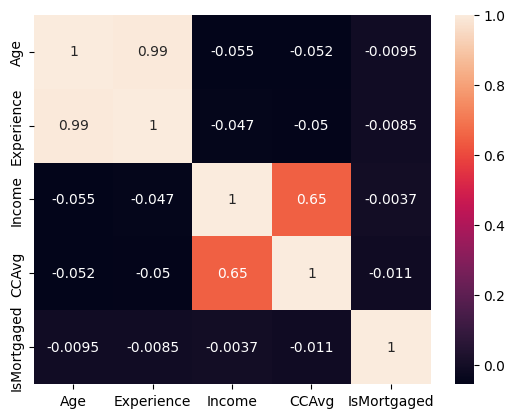

In [35]:
#Lets look at the Corralation matrix
sns.heatmap(df[num_attr1].corr(),annot=True)

In [36]:
df[num_attr1].corr()

,Age,Experience,Income,CCAvg,IsMortgaged
Age,1.000000,0.994215,-0.055269,-0.052012,-0.009545
Experience,0.994215,1.000000,-0.046574,-0.050077,-0.008499
Income,-0.055269,-0.046574,1.000000,0.645984,-0.003688
CCAvg,-0.052012,-0.050077,0.645984,1.000000,-0.011398
IsMortgaged,-0.009545,-0.008499,-0.003688,-0.011398,1.000000


In [37]:
#Converting all the attributes whose unique values are below 5 into categorical columns
cat_attr= ['Family','Education','Securities Account', 'CD Account','Online', 'CreditCard']
df[cat_attr]=df[cat_attr].astype('category')

In [38]:
df[cat_attr].dtypes

Family                category
Education             category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [39]:
data=pd.get_dummies(df,columns=cat_attr)
data.sample(5)

,Age,Experience,Income,CCAvg,Personal Loan,IsMortgaged,Family_1,Family_2,Family_3,Family_4,...,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
3858,42,18,158,0.4,1,1,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
4748,43,18,38,0.5,0,1,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
3528,43,17,41,2.2,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0
450,51,25,69,0.3,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
4523,29,4,50,1.7,0,0,0,0,0,1,...,1,0,1,0,1,0,0,1,1,0


In [40]:
data.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Personal Loan', 'IsMortgaged',
       'Family_1', 'Family_2', 'Family_3', 'Family_4', 'Education_1',
       'Education_2', 'Education_3', 'Securities Account_0',
       'Securities Account_1', 'CD Account_0', 'CD Account_1', 'Online_0',
       'Online_1', 'CreditCard_0', 'CreditCard_1'],
      dtype='object')

In [41]:
data.dtypes

Age                       int64
Experience                int64
Income                    int64
CCAvg                   float64
Personal Loan             int64
IsMortgaged               int64
Family_1                  uint8
Family_2                  uint8
Family_3                  uint8
Family_4                  uint8
Education_1               uint8
Education_2               uint8
Education_3               uint8
Securities Account_0      uint8
Securities Account_1      uint8
CD Account_0              uint8
CD Account_1              uint8
Online_0                  uint8
Online_1                  uint8
CreditCard_0              uint8
CreditCard_1              uint8
dtype: object

In [42]:
data['CCAvg']=data['CCAvg'].astype('int64')

In [43]:
data

,Age,Experience,Income,CCAvg,Personal Loan,IsMortgaged,Family_1,Family_2,Family_3,Family_4,...,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,25,1,49,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
1,45,19,34,1,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,39,15,11,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,35,9,100,2,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,35,8,45,1,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
4996,30,4,15,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
4997,63,39,24,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
4998,65,40,49,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0


In [44]:
data.dtypes

Age                     int64
Experience              int64
Income                  int64
CCAvg                   int64
Personal Loan           int64
IsMortgaged             int64
Family_1                uint8
Family_2                uint8
Family_3                uint8
Family_4                uint8
Education_1             uint8
Education_2             uint8
Education_3             uint8
Securities Account_0    uint8
Securities Account_1    uint8
CD Account_0            uint8
CD Account_1            uint8
Online_0                uint8
Online_1                uint8
CreditCard_0            uint8
CreditCard_1            uint8
dtype: object

###Train Test Split for our model

In [45]:
from sklearn.model_selection import train_test_split
y=data['Personal Loan']
X=data.drop(['Personal Loan'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 20)
(1000, 20)
(4000,)
(1000,)


In [46]:
#Standardization of the data
from sklearn.preprocessing import StandardScaler
SC= StandardScaler()
X_train=SC.fit_transform(X_train)
X_test=SC.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn.metrics import recall_score, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve , auc , f1_score 


In [48]:
RF=RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
y_trains=RF.predict(X_train) 


print(accuracy_score(y_train, y_trains)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_trains))

100.0
99.0
[[897   1]
 [  9  93]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       898
           1       0.99      0.91      0.95       102

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3622
           1       1.00      1.00      1.00       378

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



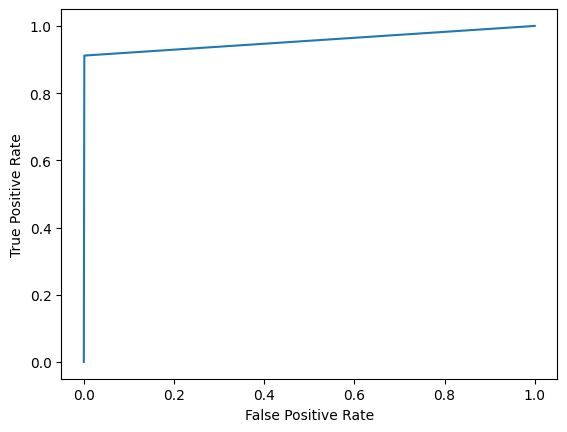

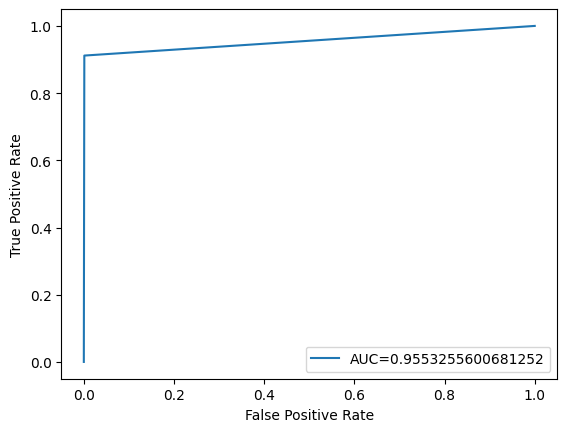

In [49]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = metrics.roc_auc_score(y_test, y_pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show() 

In [50]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
y_trains=logistic_model.predict(X_train) 

print(accuracy_score(y_train, y_trains)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_trains))

95.95
96.1
[[893   5]
 [ 34  68]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       898
           1       0.93      0.67      0.78       102

    accuracy                           0.96      1000
   macro avg       0.95      0.83      0.88      1000
weighted avg       0.96      0.96      0.96      1000

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3622
           1       0.87      0.67      0.76       378

    accuracy                           0.96      4000
   macro avg       0.92      0.83      0.87      4000
weighted avg       0.96      0.96      0.96      4000



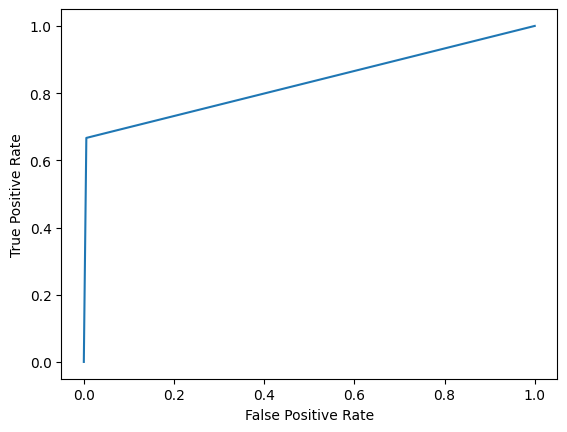

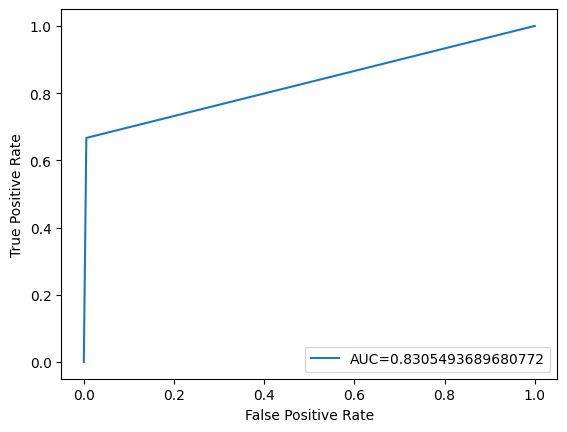

In [51]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = metrics.roc_auc_score(y_test, y_pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [52]:
svc=SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(svc.score(X_train,y_train)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_trains))

98.6
98.4
[[898   0]
 [ 16  86]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       898
           1       1.00      0.84      0.91       102

    accuracy                           0.98      1000
   macro avg       0.99      0.92      0.95      1000
weighted avg       0.98      0.98      0.98      1000

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3622
           1       0.87      0.67      0.76       378

    accuracy                           0.96      4000
   macro avg       0.92      0.83      0.87      4000
weighted avg       0.96      0.96      0.96      4000



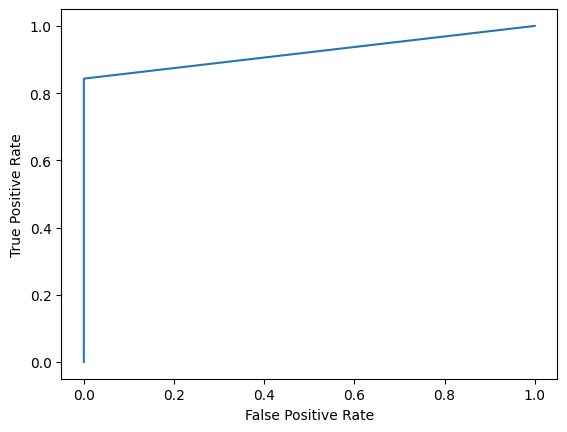

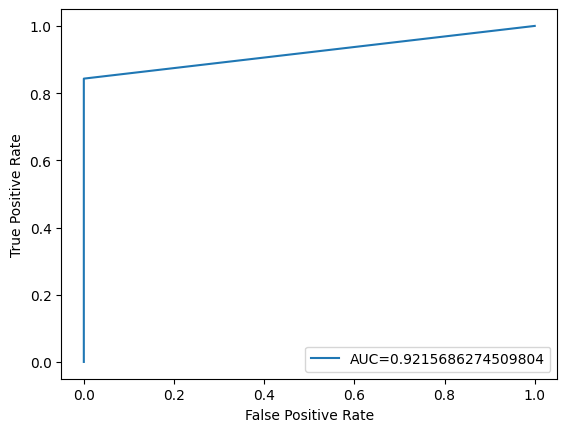

In [53]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = metrics.roc_auc_score(y_test, y_pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

###Conclusion
I've built various models like Logistic Regression, Support Vector Machine, Random Forest. The best model accuracy I got was Random Forest.